In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd
import numpy as np
import os
import sys

In [5]:
home_path = os.path.join(getcwd(), '..', '..', '..')
data_path = os.path.join(getcwd(), '..', 'data')
general_data_path = os.path.join(home_path, 'seaa-energy', 'integrate-data','data')
project_data_path = os.path.join(getcwd(), '..', 'data')
sys.path.append(os.path.join(home_path, 'helpers'))
import visualization as viz

In [7]:
# LOAD LOAD DATA
df_price = pd.read_pickle(os.path.join(general_data_path, 'df_price_day_ahead.pkl'), compression='gzip')
df_price


,AT,BE,DE_LU,DK_1,DK_2,EE,FI,FR,GB,LT,...,NL,NO_1,NO_2,NO_3,NO_4,PL,SE_1,SE_2,SE_3,SE_4
2016-01-01 00:00:00,NaN,23.86,NaN,16.39,16.39,NaN,NaN,23.86,NaN,NaN,...,23.86,16.39,16.39,16.39,16.39,NaN,16.39,16.39,16.39,16.39
2016-01-01 01:00:00,NaN,22.39,NaN,16.04,16.04,16.39,16.39,22.39,NaN,28.11,...,22.39,16.04,16.04,16.04,16.04,NaN,16.04,16.04,16.04,16.04
2016-01-01 02:00:00,NaN,20.59,NaN,15.74,15.74,16.04,16.04,20.59,NaN,16.04,...,20.59,15.74,15.74,15.74,15.74,NaN,15.74,15.74,15.74,15.74
2016-01-01 03:00:00,NaN,16.81,NaN,15.57,15.57,15.74,15.74,16.81,NaN,15.74,...,16.81,15.57,15.57,15.57,15.57,NaN,15.57,15.57,15.57,15.57
2016-01-01 04:00:00,NaN,17.41,NaN,15.47,15.47,15.57,15.57,17.41,NaN,15.57,...,17.41,15.47,15.47,15.47,15.47,NaN,15.47,15.47,15.47,15.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,225.81,225.81,225.81,225.81
2022-12-21 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,211.19,211.19,211.19,211.19
2022-12-21 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,187.91,187.91,187.91,187.91
2022-12-21 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,170.58,170.58,170.58,170.58


In [49]:
# https://opendata.esett.com/prices_single

df_intraday = pd.read_csv(os.path.join(data_path, 'Prices.csv'), sep=';')

df_intraday['Date/Hour CET/CEST'] = pd.to_datetime(df_intraday['Date/Hour CET/CEST'])

cols = ['Imbalance Purchase Price', 'Imbalance Sale Price', 'Up Regulation Price', 'Down Regulation Price']
for col in cols:
    df_intraday[col] = df_intraday[col].str.replace(',', '.').astype(float)

df_intraday

,Date/Hour CET/CEST,MBA,Imbalance Purchase Price,Imbalance Sale Price,Up Regulation Price,Down Regulation Price,Value of Avoided Activation,Incentivising Componen,Main Direction of Regulation Power per MBA
0,2021-11-02 00:00:00,SE2,-1.00,-1.00,6.63,-1.00,NaN,NaN,-1
1,2021-11-02 01:00:00,SE2,0.00,0.00,3.65,0.00,NaN,NaN,-1
2,2021-11-02 02:00:00,SE2,0.00,0.00,4.18,0.00,NaN,NaN,-1
3,2021-11-02 03:00:00,SE2,0.00,0.00,3.43,0.00,NaN,NaN,-1
4,2021-11-02 04:00:00,SE2,-0.57,-0.57,7.77,-0.57,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
10387,2023-01-08 19:00:00,SE2,84.00,84.00,84.00,65.62,NaN,NaN,1
10388,2023-01-08 20:00:00,SE2,99.00,99.00,99.00,60.98,NaN,NaN,1
10389,2023-01-08 21:00:00,SE2,117.00,117.00,117.00,57.41,NaN,NaN,1
10390,2023-01-08 22:00:00,SE2,120.00,120.00,120.00,50.02,NaN,NaN,1


In [65]:
df_intraday.loc[df_intraday['Date/Hour CET/CEST']>='2022-11-10']

,Date/Hour CET/CEST,MBA,Imbalance Purchase Price,Imbalance Sale Price,Up Regulation Price,Down Regulation Price,Value of Avoided Activation,Incentivising Componen,Main Direction of Regulation Power per MBA,dayahead
8952,2022-11-10 00:00:00,SE2,27.59,27.59,27.59,27.59,"27,55","0,05",0,27.59
8953,2022-11-10 01:00:00,SE2,26.00,26.00,26.00,26.00,26,0,0,26.00
8954,2022-11-10 02:00:00,SE2,12.00,12.00,25.76,12.00,NaN,NaN,-1,25.76
8955,2022-11-10 03:00:00,SE2,7.75,7.75,23.68,7.75,NaN,NaN,-1,23.68
8956,2022-11-10 04:00:00,SE2,7.00,7.00,22.18,7.00,NaN,NaN,-1,22.18
...,...,...,...,...,...,...,...,...,...,...
10387,2023-01-08 19:00:00,SE2,84.00,84.00,84.00,65.62,NaN,NaN,1,NaN
10388,2023-01-08 20:00:00,SE2,99.00,99.00,99.00,60.98,NaN,NaN,1,NaN
10389,2023-01-08 21:00:00,SE2,117.00,117.00,117.00,57.41,NaN,NaN,1,NaN
10390,2023-01-08 22:00:00,SE2,120.00,120.00,120.00,50.02,NaN,NaN,1,NaN


In [50]:
df_intraday = df_intraday.merge(df_price['SE_2'].rename('dayahead'), how = 'left', left_on='Date/Hour CET/CEST', right_index = True)

(0.0, 1000.0)

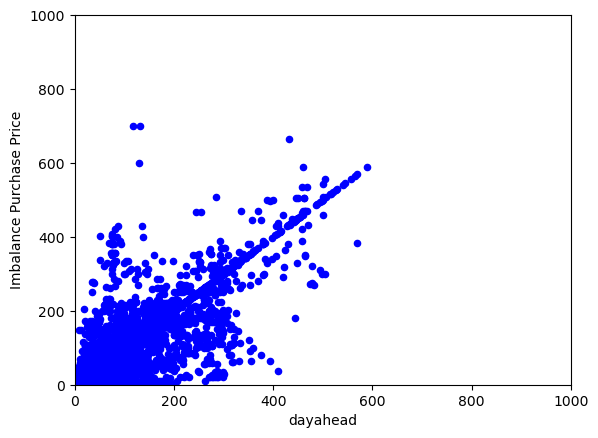

In [62]:
y = 'Imbalance Purchase Price'
x = 'dayahead'
ax = df_intraday.plot(kind= 'scatter', x = x, y = y, color = 'b')
ax.set_ylim([0,1000])
ax.set_xlim([0,1000])

(0.0, 1000.0)

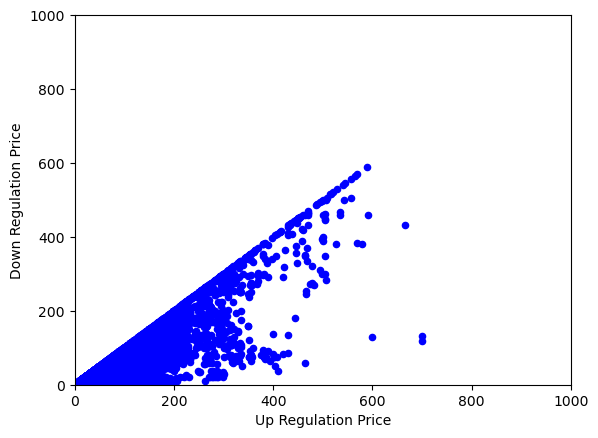

In [63]:
y = 'Down Regulation Price'
x = 'Up Regulation Price'
ax = df_intraday.plot(kind= 'scatter', x = x, y = y, color = 'b')
ax.set_ylim([0,1000])
ax.set_xlim([0,1000])

(0.0, 1000.0)

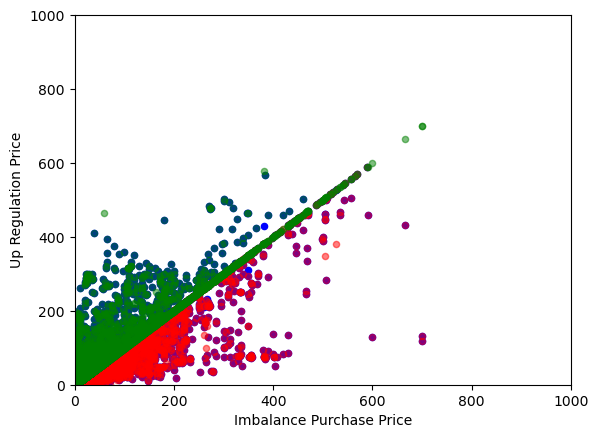

In [56]:
x = 'Imbalance Purchase Price'
y = 'dayahead'
ax = df_intraday.plot(kind= 'scatter', x = x, y = y, color = 'b')
y = 'Down Regulation Price'
df_intraday.plot(kind= 'scatter', x = x, y = y, color = 'r', ax=ax, alpha =0.5)
y = 'Up Regulation Price'
df_intraday.plot(kind= 'scatter', x = x, y = y, ax=ax, color = 'g', alpha =0.5)

ax.set_ylim([0,1000])
ax.set_xlim([0,1000])

<AxesSubplot:xlabel='Date/Hour CET/CEST'>

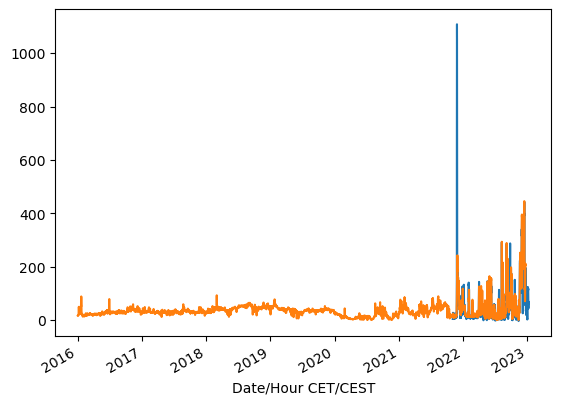

In [37]:


ax = df_intraday.set_index('Date/Hour CET/CEST')['Imbalance Purchase Price'].rolling(24).mean().plot()

df_price['SE_2'].rolling(24).mean().plot(ax=ax)

<AxesSubplot:>

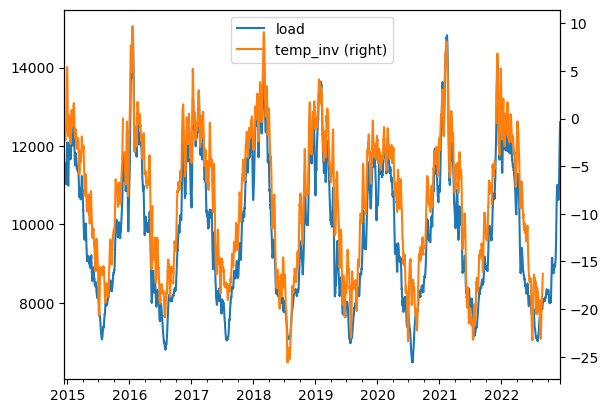

In [146]:
# MERGE DATA
df_data = df_load.merge(df_temp['temperature'].rename('temp'), how = 'left', left_index = True, right_index = True).sort_index()
#df_data = df_data.ffill()
df_data['temp_inv'] = df_data['temp']*-1
df_data[['load', 'temp_inv']].rolling(24*7).mean().plot(secondary_y = 'temp_inv')

In [147]:
df_data['weekday'] = df_data.index.dayofweek
df_data['hour'] = df_data.index.hour
df_data['year'] = df_data.index.year
df_data['dayofyear'] = df_data.index.dayofyear
df_data['weekend'] = 0
df_data.loc[df_data['weekday'].isin([5,6]), 'weekend'] = 1
df_data#.groupby('weekend')['load'].sum()

,load,temp,temp_inv,weekday,hour,year,dayofyear,weekend
2014-12-13 00:00:00,9903.0,1.5,-1.5,5,0,2014,347,1
2014-12-13 01:00:00,9724.0,0.4,-0.4,5,1,2014,347,1
2014-12-13 02:00:00,9611.0,0.8,-0.8,5,2,2014,347,1
2014-12-13 03:00:00,9640.0,1.2,-1.2,5,3,2014,347,1
2014-12-13 04:00:00,9693.0,1.3,-1.3,5,4,2014,347,1
...,...,...,...,...,...,...,...,...
2022-12-12 03:00:00,11461.0,NaN,NaN,0,3,2022,346,0
2022-12-12 04:00:00,11444.0,NaN,NaN,0,4,2022,346,0
2022-12-12 05:00:00,11782.0,NaN,NaN,0,5,2022,346,0
2022-12-12 06:00:00,12829.0,NaN,NaN,0,6,2022,346,0


<AxesSubplot:xlabel='hour'>

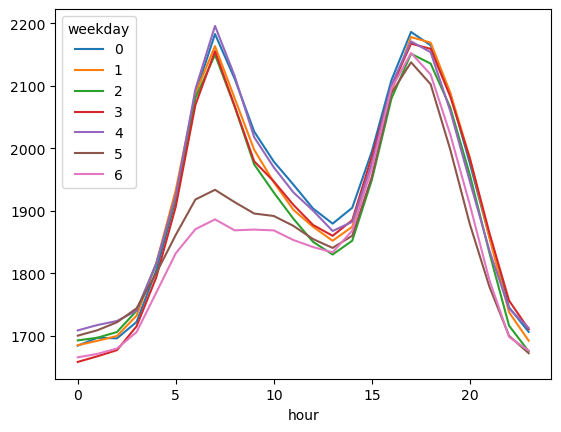

In [156]:
df_data.groupby(['hour', 'weekday', 'dayofyear','year'])['load'].mean().unstack(level=[2, 3]).std(axis=1).unstack(level=1).plot()

<AxesSubplot:>

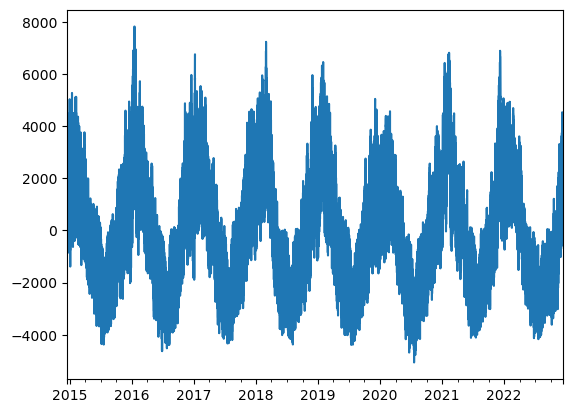

In [149]:
df_data['load'].sub(df_data['load'].mean()).plot()

In [184]:
df_data[df_data.index=='2022-04-01']

,load,temp,temp_inv,weekday,hour,year,dayofyear,weekend
2022-04-01,10660.0,-2.5,2.5,4,0,2022,91,0


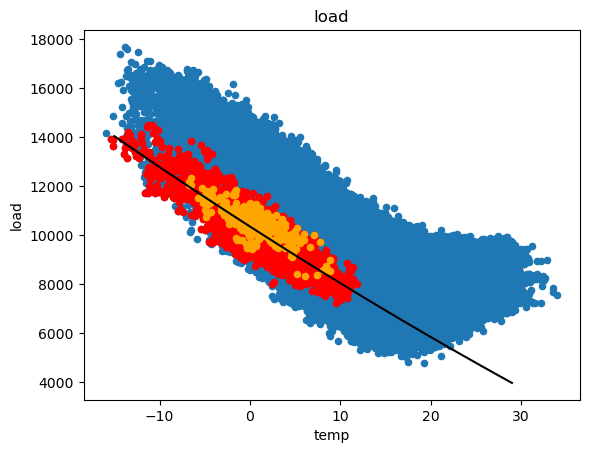

In [188]:

mask = ((df_data['dayofyear']>300) | (df_data['dayofyear']<91)) & (df_data['hour'].between(0,3))
df_data_mask = df_data.loc[mask].copy().dropna()
x = df_data_mask['temp']
y = df_data_mask['load']

ax = df_data.plot(kind='scatter', x='temp', y='load', title = f"load")
df_data_mask.plot(ax=ax,color= 'r',kind='scatter', x='temp', y='load', title = f"load")
df_data.loc[mask].loc[df_data['year']==2022].plot(ax=ax,color= 'orange',kind='scatter', x='temp', y='load', title = f"load")


x_new = np.arange(-15, 30)
fit = np.polyfit(x, y, deg=2)

p = np.poly1d(fit)
y_new = p(x_new)

plt.plot(x_new, y_new, color='black')

#plt.plot(x, y_day, color='orange')

In [180]:
df_data.loc[mask]

,load,temp,temp_inv,weekday,hour,year,dayofyear,weekend
2014-12-15 00:00:00,9323.0,4.0,-4.0,0,0,2014,349,0
2014-12-15 01:00:00,9213.0,3.7,-3.7,0,1,2014,349,0
2014-12-15 02:00:00,9303.0,3.9,-3.9,0,2,2014,349,0
2014-12-15 03:00:00,9314.0,3.5,-3.5,0,3,2014,349,0
2014-12-16 00:00:00,9838.0,2.4,-2.4,1,0,2014,350,0
...,...,...,...,...,...,...,...,...
2022-12-09 03:00:00,11177.0,NaN,NaN,4,3,2022,343,0
2022-12-12 00:00:00,11968.0,NaN,NaN,0,0,2022,346,0
2022-12-12 01:00:00,12055.0,NaN,NaN,0,1,2022,346,0
2022-12-12 02:00:00,11702.0,NaN,NaN,0,2,2022,346,0


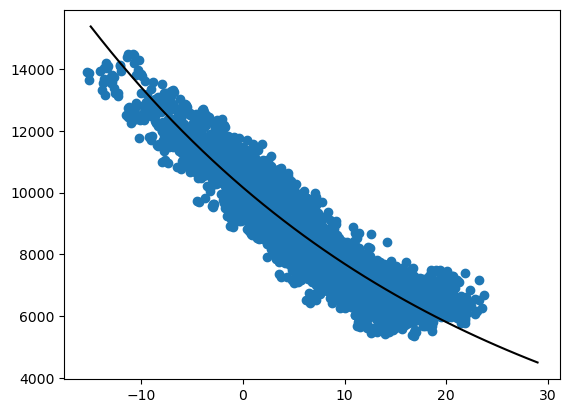

In [179]:
from scipy.optimize import curve_fit
import numpy as np
# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

p0 = (1.e5,1.,1.) # starting search koefs

opt, pcov = curve_fit(model_func, x, y, p0)
a, k, b = opt
# test result
y2 = model_func(x_new, a, k, b)

plt.scatter(x = x, y=y)
plt.plot(x_new, y2, color='black')

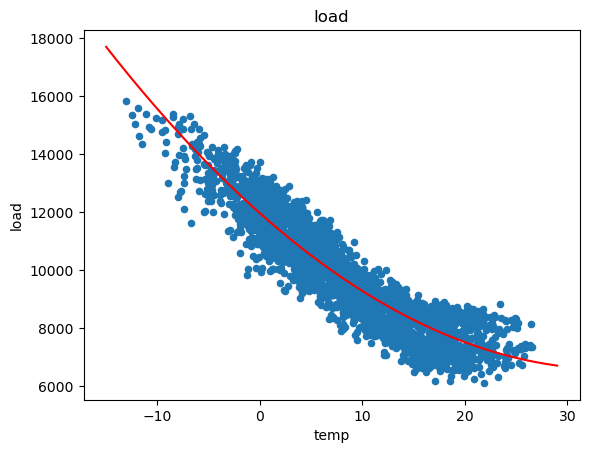

In [40]:
df_daily = df_data.groupby(df_data.index.date)[['temp', 'load']].mean().dropna()

df_daily.plot(kind='scatter', x='temp', y='load', title = f"load")


fit = np.polyfit(df_daily['temp'], df_daily['load'], deg=2)
p = np.poly1d(fit)
y_day = p(x)
y_day

plt.plot(x, y_day, color='red')

In [ ]:
df_data['load_log'] = df_data['load'].apply(np.log)
df_data_temp_model = df_data.dropna()

ax = df_data_temp_model.plot(kind='scatter', x='temp', y='load', title = f"load")
x = np.arange(-15, 30)
fit = np.polyfit(df_data_temp_model['temp'], df_data_temp_model['load'], deg=2)
p = np.poly1d(fit)
y = p(x)
y

plt.plot(x, y, color='red')

<AxesSubplot:>

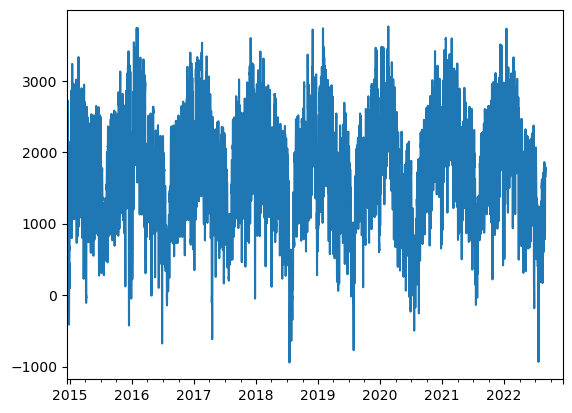

In [98]:
df_data['load_temp'] = p(df_data['temp'])

df_data['load'].sub(df_data['load_temp']).rolling(24, min_periods = 23).mean().plot()

temp,-16.0,-15.0,-14.0,-13.0,-12.0,-11.0,-10.0,-9.0,-8.0,-7.0,...,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0
week,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,13685.400000,14245.333333,14562.960000,14840.777778,14299.962963,14665.391304,14325.878788,13541.400000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14155.0,14493.8,16061.363636,15476.083333,15519.333333,14313.583333,13706.090909,15126.062500,15051.411765,14481.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,15547.000000,15724.000000,14334.687500,13984.000000,13840.909091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,12850.000000,13547.363636,13525.466667,13594.764706,13586.272727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,13527.764706,14516.076923,14434.440000,15064.780488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


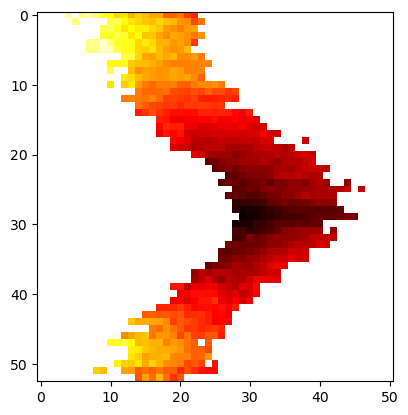

In [66]:
df_data['load_error'] = df_data['load'].sub(df_data['load_temp'])
a = df_data.groupby([df_data.index.isocalendar().week, df_data['temp'].round(0)])['load'].mean().unstack()
count = df_data.groupby([df_data.index.isocalendar().week, df_data['temp'].round(0)])['load'].count().unstack()
plt.imshow(a[count > 20], cmap='hot', interpolation='nearest')
a.head()#.stack().info()

<AxesSubplot:>

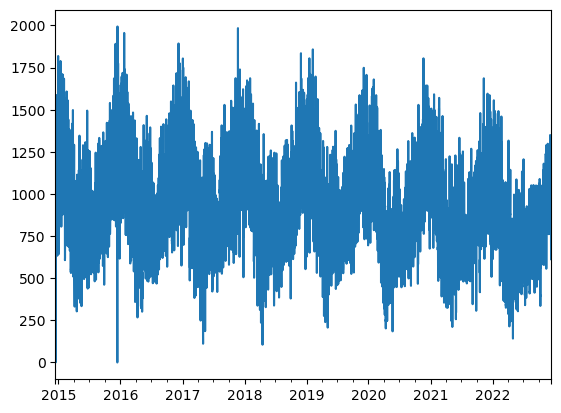

In [10]:
df_data['load'].rolling(24).std().plot()

In [11]:
df_data.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            22, 23,  0,  1,  2,  3,  4,  5,  6,  7],
           dtype='int64', length=70112)

In [12]:
import datetime
df_data_train = df_data[df_data.index < '2022-01-01'].copy()
df_data_test = df_data[df_data.index >= '2022-01-01'].copy()

<AxesSubplot:ylabel='Frequency'>

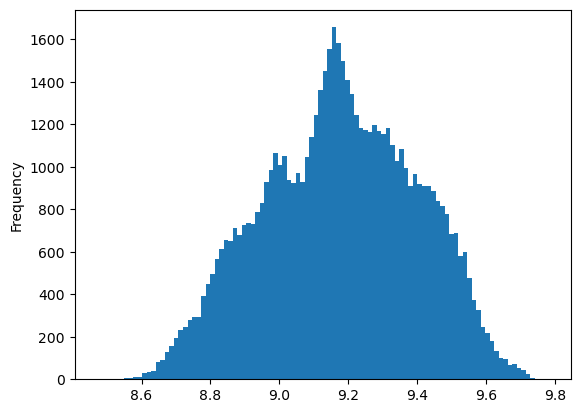

In [13]:
df_data_train['load_log'].plot(kind='hist', bins=100)

In [14]:
df_data_train['load_inv'] = 1/df_data_train['load']


In [15]:
df_data_train['load_log'] = df_data_train['load'].apply(np.log)
df_data_test['load_log'] = df_data_test['load'].apply(np.log)


x = np.arange(-10, 30)
fit_log = np.polyfit(df_data_train['temp'], df_data_train['load_log'], deg=1)
p_log = np.poly1d(fit_log)
y_log = np.exp(p_log(x))
fit_inv = np.polyfit(df_data_train['temp'], df_data_train['load_inv'], deg=1)
p_inv = np.poly1d(fit_inv)
y_inv = 1/p_inv(x)


ax = df_data_train.plot(kind='scatter', x='temp', y='load', title = f"load")
ax = df_data_train.plot(kind='scatter', x='temp', y='load', title = f"load")
#df_data_test.plot(ax=ax,kind='scatter', x='temp', y='load_log', color='black', edgecolor= 'black')
#df_data_train['count'] = range(df_data_train.shape[0])

plt.plot(x, y_log, color='red')
plt.plot(x, y_inv, color='yellow')

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
df_data_train['weekday'] = pd.to_datetime(df_data_train.index).weekday
df_data_train['load_pct_deviation'] = df_data_train['load'].div(df_data_train['load'].rolling(7, min_periods = 6).mean())
weekday_scale = df_data_train.groupby('weekday')['load_pct_deviation'].mean().rename('weekday_scale')



In [16]:
df_data_test['pred'] = p(df_data_test['temp'])

df_data_test['weekday'] = df_data_test.index.weekday
df_data_test = df_data_test.merge(weekday_scale, right_index = True, left_on='weekday').sort_index()
df_data_test

NameError: name 'weekday_scale' is not defined

In [17]:
df_data_test['pred_weekday'] = df_data_test['pred'].mul(df_data_test['weekday_scale'])
df_data_test

KeyError: 'weekday_scale'

In [18]:
df_data_train['pred'] = p(df_data_train['temp'])
df_data_train

,load,temp,temp_inv,load_log,load_temp,load_error,load_inv,pred
2014-12-13 00:00:00,9903.0,1.5,-1.5,9.200593,11266.627641,-1363.627641,0.000101,11266.627641
2014-12-13 01:00:00,9724.0,0.4,-0.4,9.182352,11603.726203,-1879.726203,0.000103,11603.726203
2014-12-13 02:00:00,9611.0,0.8,-0.8,9.170664,11479.360458,-1868.360458,0.000104,11479.360458
2014-12-13 03:00:00,9640.0,1.2,-1.2,9.173676,11357.034084,-1717.034084,0.000104,11357.034084
2014-12-13 04:00:00,9693.0,1.3,-1.3,9.179159,11326.771143,-1633.771143,0.000103,11326.771143
...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,10929.0,4.1,-4.1,9.299175,10531.157816,397.842184,0.000091,10531.157816
2021-12-31 20:00:00,10452.0,3.3,-3.3,9.254549,10748.279054,-296.279054,0.000096,10748.279054
2021-12-31 21:00:00,10084.0,2.7,-2.7,9.218705,10916.473331,-832.473331,0.000099,10916.473331
2021-12-31 22:00:00,10040.0,2.3,-2.3,9.214332,11031.152064,-991.152064,0.000100,11031.152064


<AxesSubplot:>

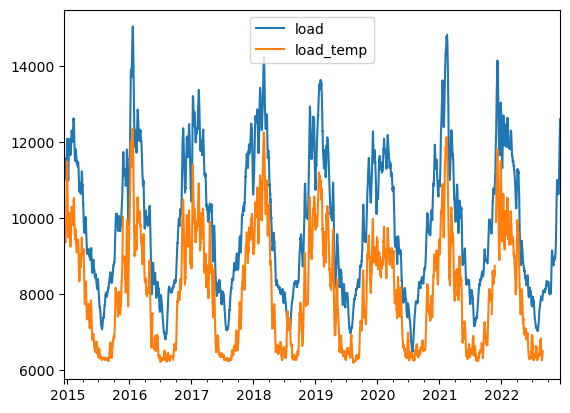

In [99]:
df_data[['load', 'load_temp']].rolling(24*7).mean().plot()

In [ ]:
df_data_test[['load', 'pred', 'pred_weekday']].plot()

KeyError: "['pred_weekday'] not in index"

## PROPHET

In [21]:
from prophet import Prophet

In [22]:
df_data_train_prophet = df_data_train[['load', 'temp']].reset_index().rename(columns = {'index':'ds','load':'y'})
df_data_test_prophet = df_data_test[['load', 'temp']].reset_index().rename(columns = {'index':'ds','load':'y'})

df_data_test_prophet

,ds,y,temp
0,2022-01-01 00:00:00,9685.0,0.7
1,2022-01-01 01:00:00,9612.0,0.4
2,2022-01-01 02:00:00,9601.0,0.7
3,2022-01-01 03:00:00,9552.0,0.7
4,2022-01-01 04:00:00,9449.0,0.3
...,...,...,...
8283,2022-12-12 03:00:00,11461.0,NaN
8284,2022-12-12 04:00:00,11444.0,NaN
8285,2022-12-12 05:00:00,11782.0,NaN
8286,2022-12-12 06:00:00,12829.0,NaN


In [24]:
m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
m.add_regressor('temp')
m.fit(df_data_train_prophet.ffill())

C:\Users\ohjartarson\Anaconda3\envs\prophet\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(df_data_test_prophet)

In [ ]:
forecast[['ds', 'yhat']]

In [ ]:
df_data_test_prophet['ds'] = pd.to_datetime(df_data_test_prophet['ds'])
df_data_test_prophet.info()
df_data_test.info()# = df_data_test.merge(forecast[['ds', 'yhat']], right_on = 'ds', left_index=True)

In [191]:
df_data_test_prophet = df_data_test_prophet.dropna()#.set_index('ds')
accuracy = df_data_test_prophet[['yhat', 'pred', 'pred_weekday']].sub(df_data_test_prophet['y'], axis=0).abs().mean()
df_data_test_prophet[['y','pred','yhat', 'pred_weekday']].plot()
accuracy

NameError: name 'df_data_test_prophet' is not defined

yhat    739.397896
pred    215.936189
dtype: float64

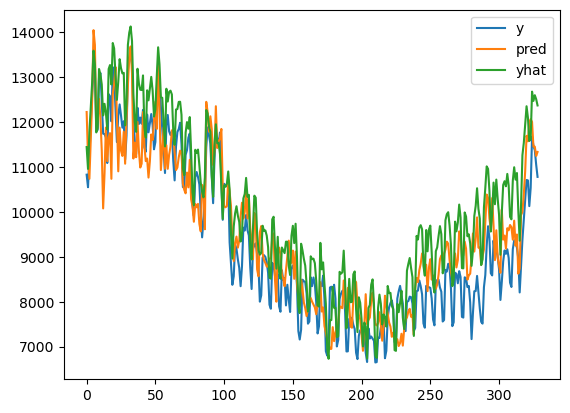

In [17]:
df_data_test_prophet = df_data_test_prophet.dropna()#.set_index('ds')
accuracy = df_data_test_prophet[['yhat', 'pred']].sub(df_data_test_prophet['y'], axis=0).mean()
df_data_test_prophet[['y','pred','yhat']].plot()
accuracy

,prob,prob_game,rand1,game,prob_win,rand2,win
0,0.375,0.281632,0.586094,False,0.052734,0.809198,False
1,0.375,0.281632,0.347985,False,0.052734,0.253117,False
2,0.375,0.281632,0.556344,False,0.052734,0.234734,False
3,0.375,0.281632,0.655282,False,0.052734,0.998669,False
4,0.375,0.281632,0.399466,False,0.052734,0.985444,False


In [248]:
df.loc[(df['prob']==0.375) & (df['game']), 'win'].mean()

0.04852243706676396

In [251]:
df.loc[(df['prob']==0.375), 'game'].mean()

0.2741

In [288]:
1*1.6**14

720.5759403792799

In [283]:
(100/1)**(1/7)

1.93069772888325

In [290]:
1280*1

1280

In [287]:
450/350

1.2857142857142858

In [259]:
from bs4 import BeautifulSoup
import requests

html = requests.get('https://tingent.se/jobs').content
#html = requests.get('http://upgraded.workbuster.com').content
soup = BeautifulSoup(html, 'html.parser')

#soup

In [ ]:
# TINGENT
data = json.loads(soup.find('script', type='application/json').text)
data
pd.DataFrame(data['props']['pageProps']['jobsData']).to_excel('tingent.xlsx')

# KEYMAN
html = requests.get('https://keyman.se/uppdrag/').content
soup = BeautifulSoup(html, 'html.parser')

for a in soup.find_all('div', 
     class_ = 'post-content-wrap'):
    print(a)

In [258]:
# TINGENT
data = json.loads(soup.find('script', type='application/json').text)
df_adds = pd.DataFrame(data['props']['pageProps']['jobsData'])
df_adds

,requisition_enddate,requisition_shortdescription,requisition_startdate,mspperson_cellphone,mspperson_email,requisition_locationid,requisition_skillset,requisition_servicecategoryid,requisition_competencelevel,requisition_worktimepercentage,requisition_name,abstract_id,requisition_offerduedate,requisition_searchermsppersonid,requisition_publisheddate,requisition_competenceareaid
0,,Vi söker en IT support tekniker på heltid med ...,2023-01-03,,luisa@tingent.se,Stockholm,[],Tech (IT-consulting),,100,IT Support tekniker,12467,,Luisa Perea,2022-12-20,Other Infra
1,,We are looking for an experienced Agile Coach ...,,,moa@tingent.se,Stockholm,[],Tech (IT-consulting),,100,Agile Coach,12466,,Moa Zombory,2022-12-19,Agile Coach
2,,Vi letar efter en DBA med kunskap inom IT-säke...,,,ludde@tingent.se,Stockholm,[],Tech (IT-consulting),,100,DBA,12465,,Ludvig Divander,2022-12-19,DBA
3,,,2023-01-02,,sandra@tingent.se,Stockholm,[],Tech (IT-consulting),,100,Solution Architect Developer Sharepoint M365,12463,,Sandra Jarsäter,2022-12-19,Systems & Solution Architect
4,,We are looking for a back end developer to our...,2023-01-02,,moa@tingent.se,Stockholm,[],Tech (IT-consulting),,100,Java Developer,12462,,Moa Zombory,2022-12-19,Java Development
5,,"Kunskaper: Microsoft Dynamics CRM, systemutvec...",2023-01-02,,sandra@tingent.se,Stockholm,[],Tech (IT-consulting),,100,C# utvecklare,12461,,Sandra Jarsäter,2022-12-19,.Net Development
6,,Good understanding of Cisco Software-Defined A...,2022-12-30,,sandra@tingent.se,Stockholm,[],Tech (IT-consulting),,100,Experienced Network Technician,12460,,Sandra Jarsäter,2022-12-16,Helpdesk & Support
7,,Vi söker en TS/Node utvecklare till vår kund i...,2022-12-30,,luisa@tingent.se,Stockholm,[],Tech (IT-consulting),,100,TS/Node utvecklare,12458,,Luisa Perea,2022-12-16,Front End Development
8,,"Du ska erfarenhet av Apache Active MQ, Apache...",,0702790034,malin@tingent.se,Stockholm,[],Tech (IT-consulting),,100,Teknisk Produktägare - Länsförsäkringar,12457,,Malin Nordh,2022-12-15,Product Owner
9,,Till området Sterling Integrator/Sterling File...,2023-02-02,,moa@tingent.se,Stockholm,[],Tech (IT-consulting),,100,DevOps - Sterling Integrator- Länsförsäkringar,12456,,Moa Zombory,2022-12-15,DevOps
